In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('epa-sea-level.csv')

In [19]:
X = df[['Year']]
y = df['CSIRO Adjusted Sea Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [20]:
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

years_future = np.arange(1880, 2051).reshape(-1, 1)
predictions_future = model.predict(years_future)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 0.1655
R² Score: 0.9651


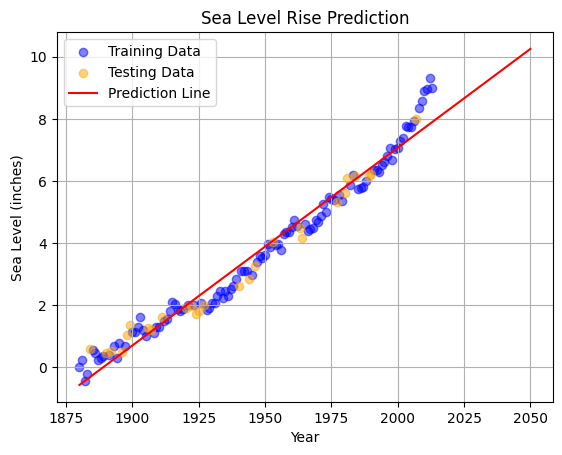

In [21]:

plt.scatter(X_train, y_train, label="Training Data", color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label="Testing Data", color='orange', alpha=0.5)

plt.plot(years_future, predictions_future, 'r', label="Prediction Line")

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Sea Level Rise Prediction")
plt.legend()
plt.grid()

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.show()

Predicted sea level in 2025: 11.22 inches
Predicted sea level in 2030: 12.05 inches
Predicted sea level in 2040: 13.72 inches
Predicted sea level in 2050: 15.38 inches


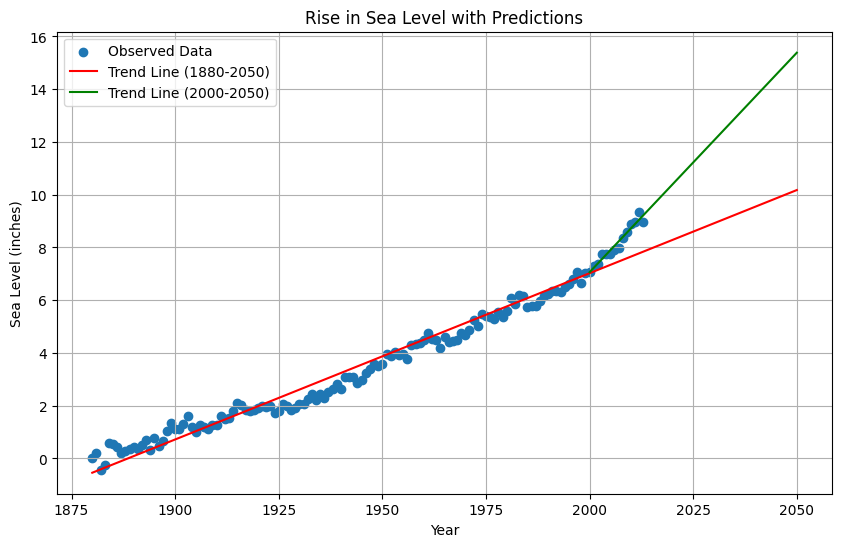

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label="Observed Data")

slope1, intercept1 = np.polyfit(df['Year'], df['CSIRO Adjusted Sea Level'], 1)
years_extended = np.arange(1880, 2051)
sea_levels_extended = slope1 * years_extended + intercept1
plt.plot(years_extended, sea_levels_extended, 'r', label="Trend Line (1880-2050)")

df_recent = df[df['Year'] >= 2000]
slope2, intercept2 = np.polyfit(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'], 1)
years_recent = np.arange(2000, 2051)
sea_levels_recent = slope2 * years_recent + intercept2
plt.plot(years_recent, sea_levels_recent, 'g', label="Trend Line (2000-2050)")

future_years = np.array([2025, 2030, 2040, 2050])
future_sea_levels = slope2 * future_years + intercept2

for year, sea_level in zip(future_years, future_sea_levels):
    print(f"Predicted sea level in {year}: {sea_level:.2f} inches")

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level with Predictions")
plt.legend()
plt.grid()

plt.show()